# Predict Air Passenger based on the previous data.
<b> This dataset provides monthly totals of a US airline passengers from 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers.
    
    
<b> The Airline Passenger time series covers roughly a decade of passengers booking numbers (in thousands) in commercial airline flights from 1949 to 1961 and has values for each month of the year. The Pan Am company used the data to predict future demand before ordering new aircraft and training aircrew.
    
    
<b> It's particularly popular with testing and demonstrating time series approaches and methodologies because it displays many interesting behaviors. In particular:

- <b> Upward trend
- <b> Seasonal behavior
- <b> Regular peaks, every 12 months, corresponding roughly to the summer months
- <b> Growing variance, where the size of the peaks is actually increasing in time
    
    
<b> This means that it's particularly well suited to test different types of algorithms and different types of methodologies for time series.    

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection/Loading the dataset
<b> Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv('AirPassengers.csv')

# Display the first 5 lines using the head() method.
df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


### Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(144, 2)

<b> From the output, we can see that the table contains 144 rows and 2 columns.

<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<b> object and int64 are the data types of our features. We see that the 1 feature is int64 + 1 feature is object). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 144 observations, the same number of rows we saw before with shape.
    
    
<b> The 'Air Passengers' Dataset contains:
    
- **Month:** Months which passengers are booked tickets.
    

- **Passengers:** Number of persons booked the tickets in that perticular month.

<b> Now, we will need to index Month column by using set_index() method.

In [5]:
# Set the 'Month' variable as index 
df = df.set_index('Month')

# Display the first 5 lines using the head() method.
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


### Visualize the Time Series 
<b> Check for trend, stationarity, seasonality or random patterns.

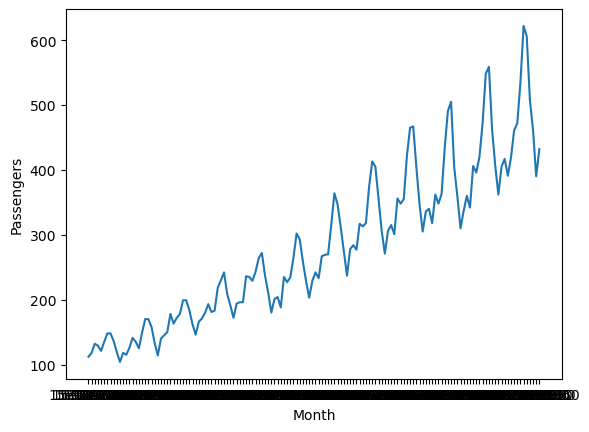

In [7]:
# Apply the lineplot
sns.lineplot(x=df.index, y=df["Passengers"])

# Display the plot
plt.show()

From the graph we can see that the series is not stationary. It has a clear upward trend and seasonal behavior. The peaks tend to happen very regularly, every 12 months and we also have a growing variance pattern where the size of the peaks is actually increasing in time.


There are two methods to check the stationarity, one is Rolling statistics and another one is Augmented Dicky Fuller Test (DFT). So now we will go with one by one.
    
    
<b> Checking for stationarity by 'Rolling Statistics'
    
The most common method to check whether a given data comes from a stationary series or not is by simply plotting the data or some function of it. Plot the moving average (mean) or moving variance (std) to check the if it is varies with time.

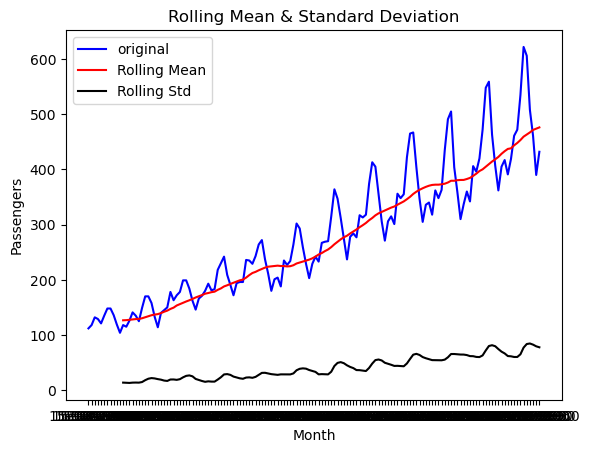

In [9]:
# Determing rolling statistics
rolmean = df['Passengers'].rolling(window=12).mean()         # Calculate the mean of 12 months
rolstd = df['Passengers'].rolling(window=12).std()           # Calculate the standard deviation of 12 months

# Plot rolling statistics
orig = plt.plot(df['Passengers'], color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

From the graph we can see that the series is not stationary. It has a clear upward trend and seasonal behavior. From the above figure, we can see that the mean and variance increase constantly. 

In the above we have used 'Series.rolling(window)' function, which is:

- It provide rolling window calculations. 


- window: Size of the moving window.

Here we have used 12 months window, based on that we have calculated mean, std and plots the different plots.

<b> Checking for stationarity by 'Augmented Dicky Fuller Test (DFT)'
    
The Augmented Dickey-Fuller test is one of the most popular tests to check for stationarity. It tests the below hypothesis.
    
    
- Null Hypothesis, H0: The data is not stationary.
- Alternative Hypothesis, H1: The data is stationary.
    
    
We can use the adfuller method from the statsmodels library to perform this test in Python and compare the value of the test statistics or the p-value.
    
    
Based on the p-value, we will accept the or reject Null Hypothesis (HO) - (If p-value < 0.05 reject Null Hypothesis) 

In [18]:
# import the 'adfuller' class from statsmodels library
from statsmodels.tsa.stattools import adfuller

# Checking the stationarity by 'Augmented Dicky Fuller Test (DFT)'
adfuller_test = adfuller(df['Passengers'])

adfuller_result = pd.Series(adfuller_test[0:4], index=['Dickey Fuller test statistic','p-value',
                             '#Lags Used','Number of Observations Used'])

for key,value in adfuller_test[4].items():
    adfuller_result['Critical Value (%r)'%key] = value
print(adfuller_result)

Dickey Fuller test statistic      0.815369
p-value                           0.991880
#Lags Used                       13.000000
Number of Observations Used     130.000000
Critical Value ('1%')            -3.481682
Critical Value ('5%')            -2.884042
Critical Value ('10%')           -2.578770
dtype: float64


In the above, first we have imported the 'adfuller' class from the statsmodels library and applyied the 'adfuller' class on 'Passengers' variable. The 'adfuller' class returns as follows:

- adf : The test statistic.


- pvalue : p-value based on MacKinnon (1994, 2010).


- usedlag : The number of lags used.


- nobs : The number of observations used for the ADF regression and calculation of the critical values.


- critical values : dict - Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010). 


For a Time series to be stationary, its ADCF test should have:

- p-value less than 0.05


- critical values at 1%, 5%, 10% confidence intervals greater than the value of the Test Statistics. 


<b> In our case the p-value is almost maximum (1.0) and the critical values are far from the test statistic so we fail to reject the Null Hypothesis that the series is not stationary.

### Now, we have to convert the non-stationary data to stationary data
<b> Here we are converting the non-stationary data to stationary data by 'Differencing' method by using 'Time Shift Transformation'.
    
Differencing is performed by substracting the previous observation from the current observation.
    
    Δyt = (yt) – (yt-1)
    
    
Where,

- 'Δyt' is the difference between two successive values.

    
- 'yt' is the value of y at t and 'yt-1' is the value preceding yt.
    
    

In [41]:
# Apply differenting
diff = df["Passengers"] - df['Passengers'].shift(2)

# dropping the 'NaN' values from the 'diff' object
diff.dropna(inplace=True)

# Applying ADF test
adfuller_output = adfuller(diff)

adfuller_result = pd.Series(adfuller_output[0:4], index=['Dickey Fuller test statistic','p-value',
                             '#Lags Used','Number of Observations Used'])

for key,value in adfuller_test[4].items():
    adfuller_result['Critical Value (%r)'%key] = value
print(adfuller_result)

Dickey Fuller test statistic     -2.961695
p-value                           0.038630
#Lags Used                       11.000000
Number of Observations Used     130.000000
Critical Value ('1%')            -3.481682
Critical Value ('5%')            -2.884042
Critical Value ('10%')           -2.578770
dtype: float64


<b> Now we can see that, the p-value is less than 0.05. So we are going to reject the Null Hypothesis that the series is stationary. Critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. So we can now say that given series is now STATIONARY

<b> After dropping now let’s have a look at data dimensionality of 'diff' object.

In [34]:
diff.shape

(142,)

<b> Now, we can see that we have only 142 records, because we have dropped 'NaN' records from the 'diff' object.

### Plot ACF/PACF and find p, q, d parameters
<b> Now we are going to plot the ACF/PACF and find p, q, d parameters.

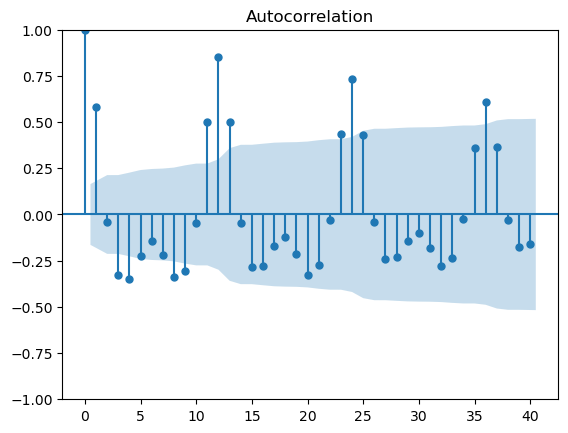

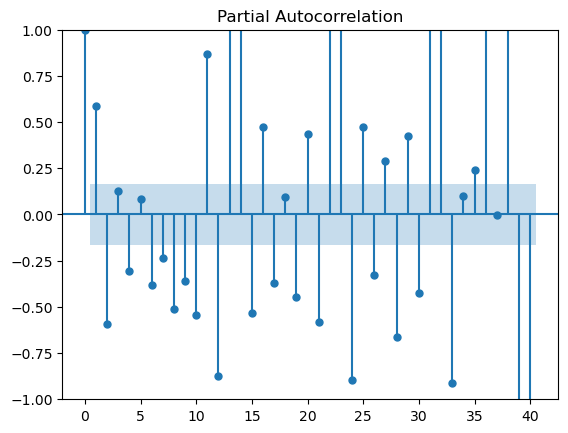

In [32]:
# import the 'acf, pacf' classes from statsmodels library
from statsmodels.tsa.stattools import acf, pacf

# import the 'statsmodels.api' as 'sm'
import statsmodels.api as sm

# plot the 'ACF' (Autocorrelation plot)
fig = sm.graphics.tsa.plot_acf(diff, lags=40)

# plot the 'PACF' (Partial Autocorrelation plot)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40)


<b> From the ACF curve, optimal value of 'q' in the ARIMA  model must be 1
    
<b> From the PACF curve, optimal value of 'p' in the ARIMA  model must be 1
    
<b> From the above, we have got the 'p & q' parameters.

### Train/Test Split
<b> Now we are going to split the data into train (80%) & test (20%).
    
- For time series data, we have use first 80% of records for training & next 20% of records for testing. Here we are unable to apply 'train_test_split' function, because it will choose the train and test records randomly, but in time series we raquired sequential data not random data.
    
    
- Here 80% = 0.8*142 = 114 records, so first 114 records we have to use for training and remaining 28 records for testing.
    
    
<b> Note: We should not apply 'train_test_split' function, because it devides the data randomly.    

In [35]:
# split the data as train and test.
y_train = diff[ :114]                # train data

y_test = diff[114: ]                 # test data


### Build a ARIMA Model
<b> ARIMA model is build by using p, d, q values.
    
- p is AR value (determined from PACF plot)
    
    
- d is integration.
    
    
- q is MA value (determined from ACF plot)
    
    
<b> Modelling ARIMA

In [46]:
# ARIMA Modelling

# import 'ARIMA' class from statsmodels.tsa.arima.model library
from statsmodels.tsa.arima.model import ARIMA

# Build the ARIMA model and save the model as "model"
model = ARIMA(diff, order=(1, 2, 1))

# Train the model and save as 'ARIMA' object
ARIMA = model.fit()


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<b> Prediction on ARIMA model

In [47]:
# Predict on the test data set.
ypred_test = ARIMA.predict(start=y_test.index[0], end=y_test.index[-1])

# Predict on the train data set.
ypred_train = ARIMA.predict(start=y_train.index[0], end=y_train.index[-1])

<b> Evaluation of ARIMA model

In [49]:
# import 'r2_score' class from sklearn.metrics library
from sklearn.metrics import r2_score

# print the train R2
print('Train R2:', r2_score(ypred_train, y_train))

# print the test R2
print('Test R2:', r2_score(ypred_test, y_test))

Train R2: 0.34022485467749053
Test R2: 0.4239665880025725


<b> Here ARIMA model is not performing well, because there is seasonality in the given data. So now we are building the SARIMA model (SARIMAX model)

### Build a SARIMA Model
<b> SARIMA uses differencing at lag 12 to remove additive seasonal effects. As with lag 1 differencing to remove the trend, the lag 12 differencing introduces a moving average term. SARIMA includes AR and MA terms at lag 12.
    
<b> Whenever, there is seasonality in given data, apply SARIMA (SARIMAX) model. SARIMA model is build by using p, d, q, s values.

- p is AR value (determined from PACF plot)
    
    
- d is integration.
    
    
- q is MA value (determined from ACF plot)
    
    
- s is seasonality value
    
    
<b> Modelling SARIMA (SARIMAX)

In [52]:
# SARIMA Modelling

# import 'SARIMAX' class from statsmodels.tsa.statespace.sarimax library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the SARIMAX model and save the model as "model"
model = SARIMAX(diff, seasonal_order=(1, 2, 1, 12))

# Train the model and save as 'SARIMAX' object
SARIMAX = model.fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<b> Prediction on SARIMAX model

In [54]:
# Predict on the test data set.
ypred_test = SARIMAX.predict(start=y_test.index[0], end=y_test.index[-1])

# Predict on the train data set.
ypred_train = SARIMAX.predict(start=y_train.index[0], end=y_train.index[-1])

<b> Evaluation of SARIMAX model

In [55]:
# import 'r2_score' class from sklearn.metrics library
from sklearn.metrics import r2_score

# print the train R2
print('Train R2:', r2_score(ypred_train, y_train))

# print the test R2
print('Test R2:', r2_score(ypred_test, y_test))

Train R2: 0.9053231946009926
Test R2: 0.954034855915784


<b> Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets. We got an accuracy of 95.40% with this model.